### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [7]:
vehicle_df = pd.read_csv("vehicle.csv")
vehicle_df.dropna()
vehicle_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [17]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [8]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

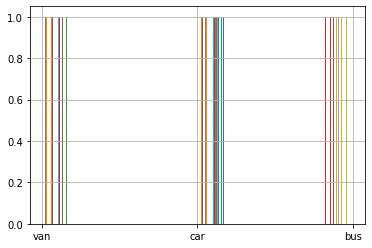

In [9]:
vehicle_df['class'].hist()

### Check for any missing values in the data 

In [18]:
vehicle_df2 = vehicle_df.loc[:, 'compactness':'hollows_ratio']
vehicle_df2[~vehicle_df2.applymap(np.isreal).all(1)]
vehicle_df2 = vehicle_df2.fillna(0)
vehicle_df2

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
5,107,0.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
9,93,44.0,98.0,0.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [19]:
from scipy.stats import zscore

vehicle_scaled = vehicle_df2.apply(zscore)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [41]:

Cluster_error = []


### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [42]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 11 )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=2)
  clusters.fit(vehicle_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": Cluster_error } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,15228.000000
1,2,9547.948386
2,3,8221.588651
3,4,7010.336111
4,5,7208.535407
5,6,6051.759885
6,7,5648.852548
7,8,5278.108597
8,9,5019.486390
9,10,4791.511826


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

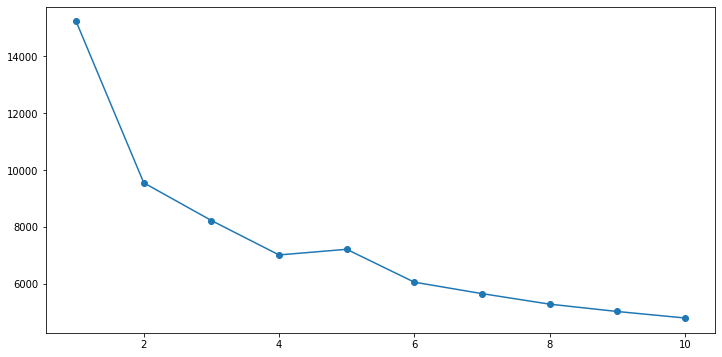

In [43]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [0]:
# the optimal valur of K is 6

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [46]:
kmeans = KMeans(n_clusters=6, n_init = 10, random_state=2)
kmeans.fit(vehicle_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [48]:
centroids=kmeans.cluster_centers_
centroids

array([[-1.00295914e+00, -5.72893898e-01, -9.77890914e-01,
        -1.05672632e+00, -5.35639779e-01, -4.07520083e-01,
        -8.42133250e-01,  9.41482671e-01, -7.36843983e-01,
        -6.50869828e-01, -7.81192136e-01, -8.17941877e-01,
        -4.93358335e-01,  7.51004944e-01, -9.34537304e-02,
        -2.72136001e-01, -7.21498013e-01, -1.21634099e+00],
       [ 1.23593988e+00,  1.09843823e+00,  1.21148722e+00,
         8.69034456e-01,  3.35029265e-02,  2.49943067e-01,
         1.38052812e+00, -1.24670361e+00,  1.30230141e+00,
         1.21008791e+00,  1.22760461e+00,  1.39612727e+00,
         1.15901782e+00,  3.58395727e-03,  1.98201567e-01,
         3.04078725e-01, -3.41861728e-02,  1.36619096e-01],
       [-3.81795754e-01, -7.62802634e-01, -5.52847352e-01,
        -2.25701246e-01,  8.87727553e-02, -2.29848871e-01,
        -7.15975283e-01,  6.52640954e-01, -6.74925841e-01,
        -8.41462215e-01, -6.91015888e-01, -6.89255045e-01,
        -9.25600184e-01, -7.63312288e-01, -1.92596041e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [49]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_scaled) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-1.002959,-0.572894,-0.977891,-1.056726,-0.535640,-0.407520,-0.842133,0.941483,-0.736844,-0.650870,-0.781192,-0.817942,-0.493358,0.751005,-0.093454,-0.272136,-0.721498,-1.216341
1,1.235940,1.098438,1.211487,0.869034,0.033503,0.249943,1.380528,-1.246704,1.302301,1.210088,1.227605,1.396127,1.159018,0.003584,0.198202,0.304079,-0.034186,0.136619
2,-0.381796,-0.762803,-0.552847,-0.225701,0.088773,-0.229849,-0.715975,0.652641,-0.674926,-0.841462,-0.691016,-0.689255,-0.925600,-0.763312,-0.192596,0.059570,0.692225,0.817275
3,-0.735574,0.097639,-0.237721,2.769452,6.492482,8.846940,-0.529319,0.471427,-0.483814,0.275809,1.601084,-0.580274,0.203131,4.170169,-0.267616,-0.219614,-0.455341,-0.438151
4,-0.082445,-1.503182,-0.581835,-0.653252,-0.656534,-0.558308,-1.060060,1.149009,-0.876958,-1.723216,-0.900242,-0.987699,-1.466492,-1.015388,-0.267616,0.829512,-21.104531,1.394546
5,0.019626,0.063488,0.168333,0.216866,0.187109,0.010356,-0.001845,-0.196699,-0.064460,0.085557,0.001737,-0.069636,0.060487,-0.229191,0.065091,-0.118338,0.263816,0.356130


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [53]:
kmeans.labels_

array([5, 2, 1, 2, 3, 1, 5, 2, 2, 5, 2, 2, 5, 5, 5, 1, 0, 5, 1, 1, 0, 0,
       2, 2, 1, 5, 0, 1, 5, 0, 5, 2, 2, 1, 2, 2, 0, 3, 1, 0, 1, 0, 5, 2,
       1, 5, 0, 0, 5, 5, 0, 2, 1, 2, 1, 2, 5, 5, 1, 0, 1, 0, 0, 0, 5, 0,
       2, 1, 2, 5, 5, 1, 5, 0, 5, 1, 5, 2, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       5, 0, 1, 5, 1, 5, 0, 1, 0, 0, 1, 0, 3, 2, 2, 0, 5, 5, 1, 0, 0, 5,
       2, 5, 0, 0, 5, 5, 1, 1, 0, 5, 0, 5, 2, 2, 0, 5, 0, 0, 5, 1, 1, 2,
       5, 0, 1, 3, 5, 2, 0, 2, 2, 0, 1, 0, 5, 1, 5, 2, 2, 2, 5, 5, 2, 1,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 5, 1, 5, 2,
       5, 2, 2, 0, 1, 0, 2, 0, 1, 5, 5, 5, 1, 2, 5, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 5, 2, 1, 1, 2, 5, 5, 0, 0, 1, 2, 2, 2, 1, 0, 5, 0, 1, 0, 2,
       1, 5, 5, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 5, 2, 0, 1, 0, 2, 5,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 5, 1, 2, 2, 1, 1, 0, 5, 2, 2,
       5, 0, 0, 5, 2, 0, 0, 5, 2, 2, 1, 2, 0, 0, 1, 2, 5, 0, 0, 1, 0, 5,
       2, 0, 1, 0, 2, 3, 5, 2, 1, 2, 1, 0, 5, 5, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [66]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [67]:

dataFrame = pd.DataFrame(np.concatenate([a,b,c]))
dataFrame

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
5,9.824164,1.444590
6,9.216889,0.960682
7,10.199509,-2.480899
8,12.813390,-1.256776
9,13.841511,4.209154


### 10. Use scatter matrix to print all the 3 distributions

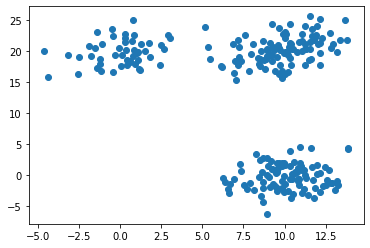

In [99]:
dataFrame.iloc[:,0]
plt.scatter(dataFrame.iloc[:,0],dataFrame.iloc[:,1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(dataFrame, 'ward','euclidean')
Z

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

### 12. Plot the dendrogram for the consolidated dataframe

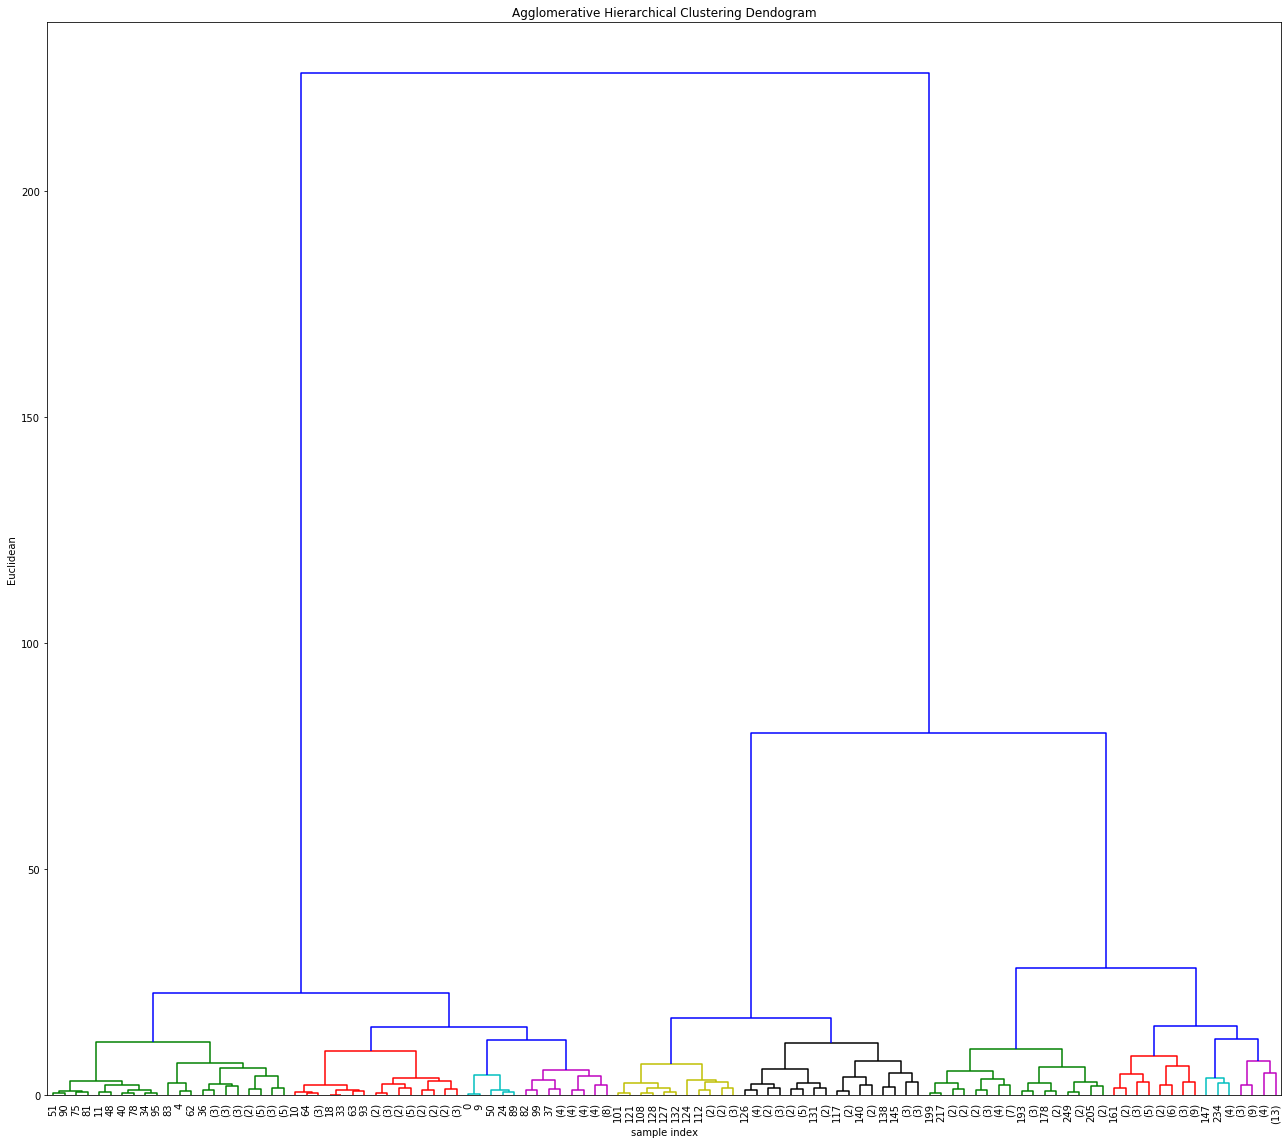

In [80]:

from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Euclidean')
dendrogram(Z,leaf_rotation=90.0,p=6,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

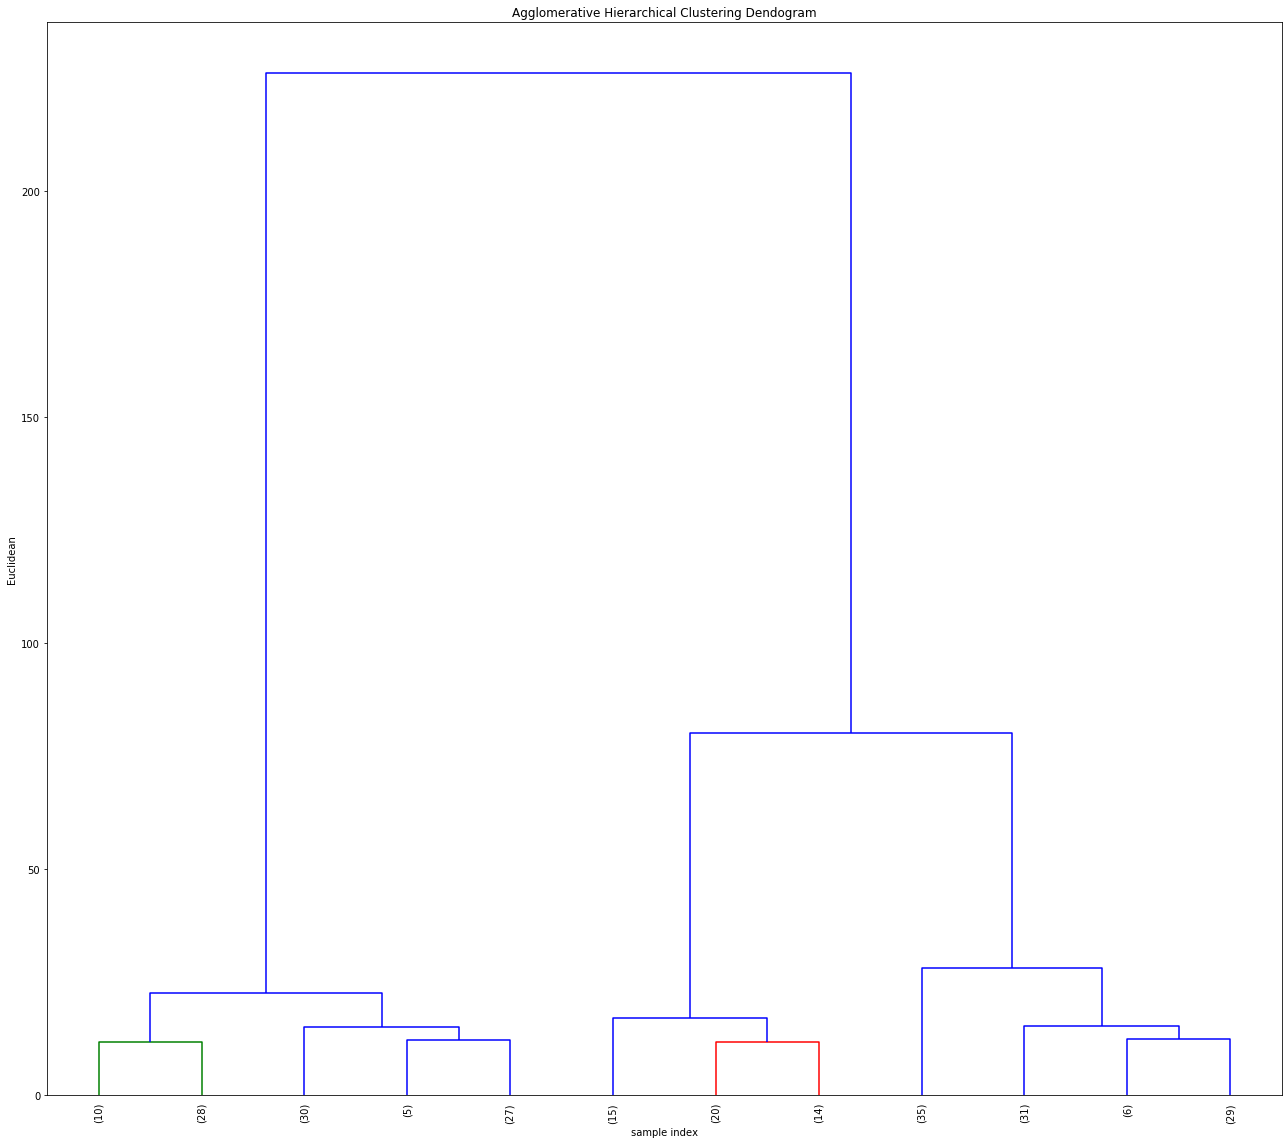

In [82]:
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Euclidean')
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [0]:
# From above truncated dendogram the Optimal distance to be used will be 50, 
# which is giving 3 groups to be used as input

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [100]:
from scipy.cluster.hierarchy import fcluster

fclus = fcluster(Z, 50, criterion='distance')
fclus

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

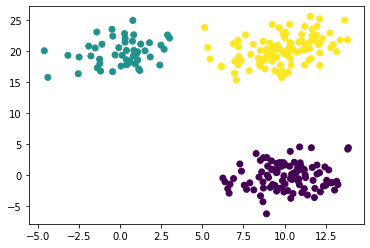

In [102]:
plt.scatter(dataFrame.iloc[:,0],dataFrame.iloc[:,1],c=fclus)